In [30]:
# input layer 784
# hidden 1 layer 10
# output layer 10

# forward propagation
# loss function
# back propagation

# activation function - relu, softmax
# learning rate
# epochs


In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
df = pd.read_csv('digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data = np.array(df)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [34]:
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255.0

In [44]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def deriv_ReLU(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1,dW2,db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y,iteration,alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iteration):
        Z1, A1, Z2, A2 = forward_prop(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1, b1, W2, b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ",get_accuracy(predictions,Y))

    return W1, b1, W2, b2


W1, b1, W2, b2 = gradient_descent(X_train,Y_train, 1500,0.1)

Iteration:  0
[0 2 9 ... 0 9 9] [9 8 1 ... 8 9 1]
Accuracy:  0.11378048780487805
Iteration:  10
[9 6 9 ... 9 0 9] [9 8 1 ... 8 9 1]
Accuracy:  0.1704878048780488
Iteration:  20
[9 6 9 ... 9 0 9] [9 8 1 ... 8 9 1]
Accuracy:  0.19721951219512196
Iteration:  30
[9 6 9 ... 9 0 9] [9 8 1 ... 8 9 1]
Accuracy:  0.2214390243902439
Iteration:  40
[9 9 9 ... 9 0 9] [9 8 1 ... 8 9 1]
Accuracy:  0.24926829268292683
Iteration:  50
[9 6 9 ... 9 3 9] [9 8 1 ... 8 9 1]
Accuracy:  0.2815121951219512
Iteration:  60
[9 9 9 ... 9 3 9] [9 8 1 ... 8 9 1]
Accuracy:  0.32351219512195123
Iteration:  70
[9 9 9 ... 9 3 9] [9 8 1 ... 8 9 1]
Accuracy:  0.37441463414634146
Iteration:  80
[9 9 1 ... 8 3 1] [9 8 1 ... 8 9 1]
Accuracy:  0.43021951219512194
Iteration:  90
[9 9 1 ... 8 3 1] [9 8 1 ... 8 9 1]
Accuracy:  0.4873658536585366
Iteration:  100
[9 9 1 ... 8 3 1] [9 8 1 ... 8 9 1]
Accuracy:  0.5345365853658537
Iteration:  110
[9 9 1 ... 8 3 1] [9 8 1 ... 8 9 1]
Accuracy:  0.5682195121951219
Iteration:  120
[9 9 

In [45]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


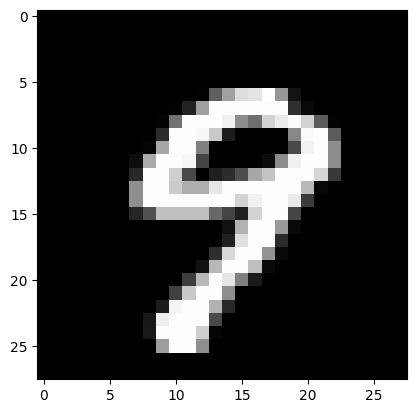

Prediction:  [3]
Label:  8


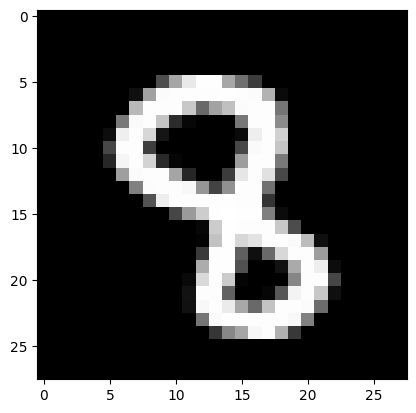

Prediction:  [1]
Label:  1


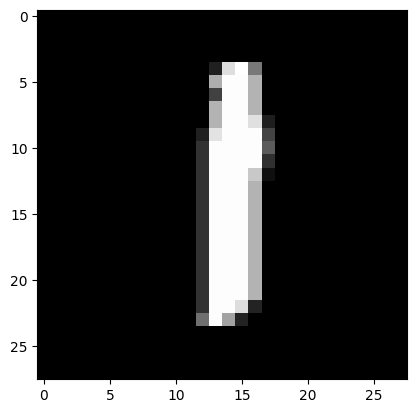

Prediction:  [5]
Label:  6


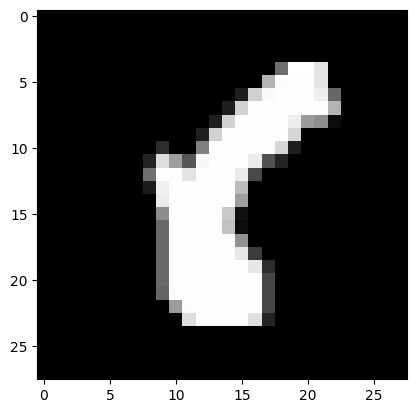

Prediction:  [9]
Label:  9


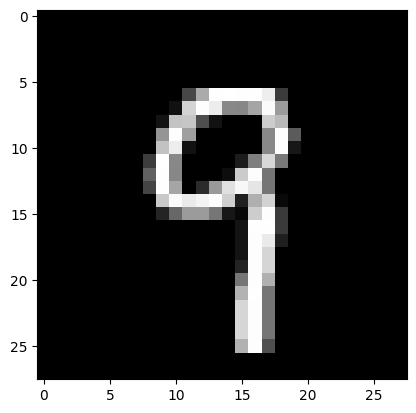

Prediction:  [3]
Label:  3


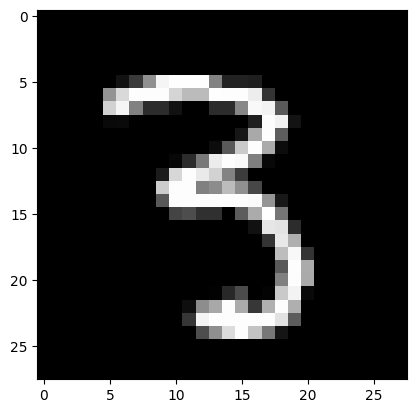

Prediction:  [8]
Label:  8


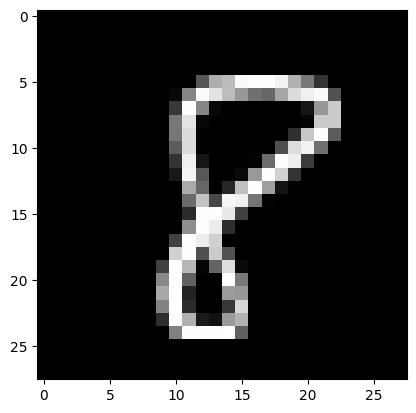

Prediction:  [8]
Label:  8


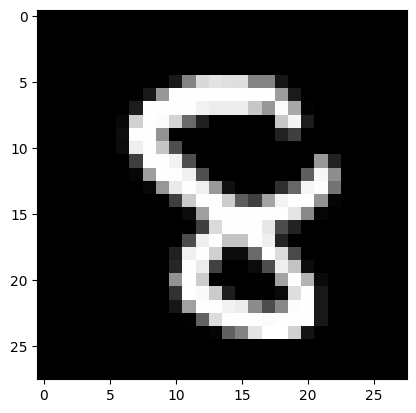

Prediction:  [7]
Label:  7


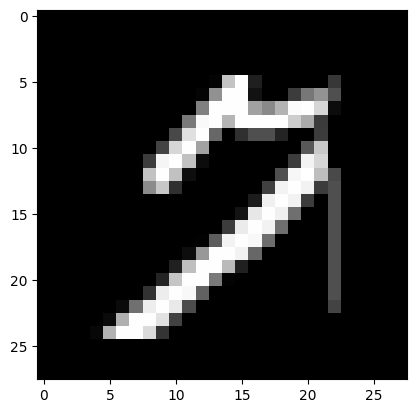

Prediction:  [4]
Label:  4


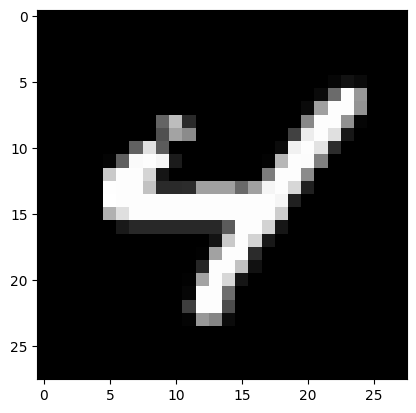

Prediction:  [9]
Label:  9


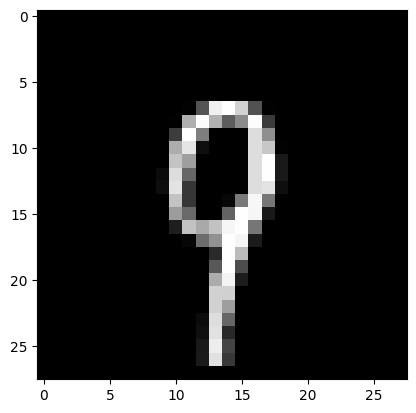

Prediction:  [6]
Label:  6


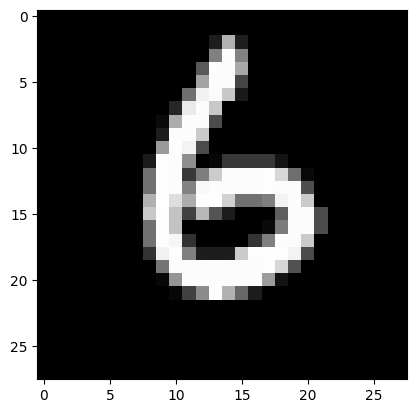

Prediction:  [3]
Label:  3


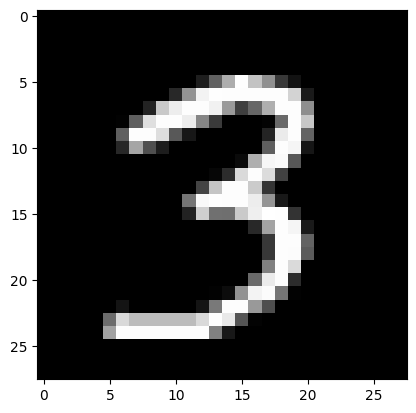

Prediction:  [8]
Label:  3


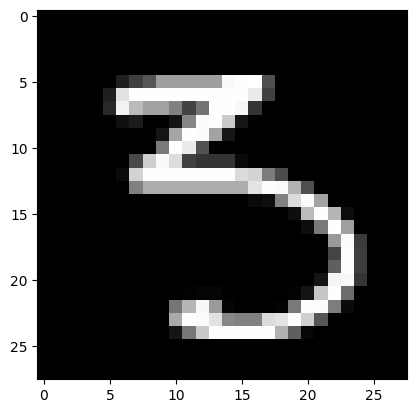

Prediction:  [8]
Label:  8


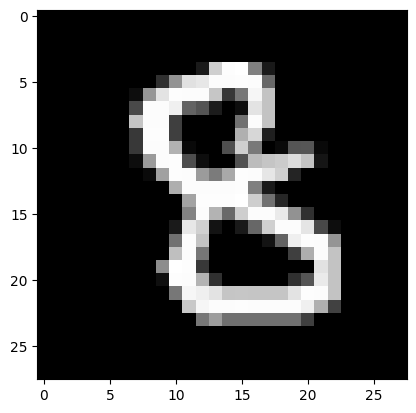

Prediction:  [5]
Label:  5


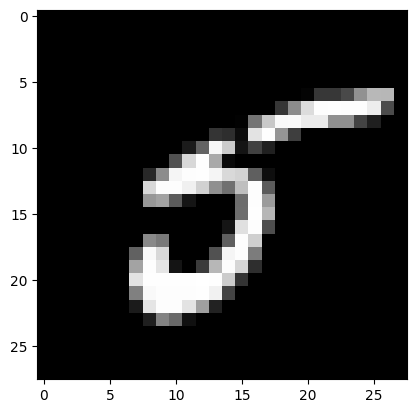

Prediction:  [3]
Label:  3


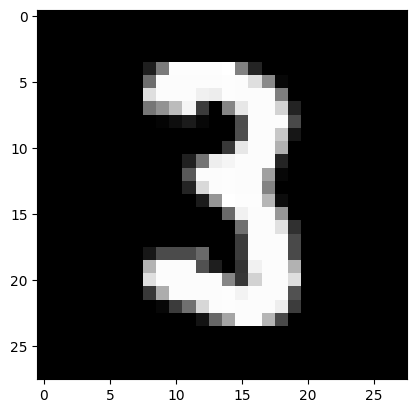

Prediction:  [0]
Label:  0


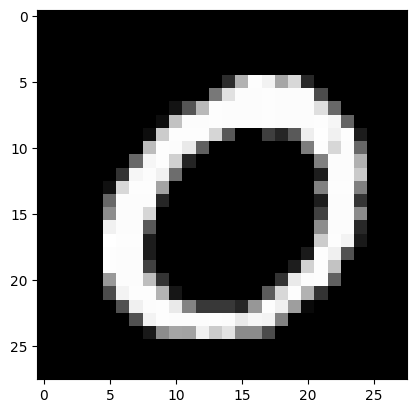

Prediction:  [0]
Label:  0


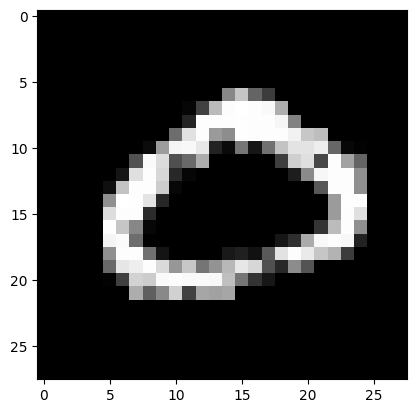

Prediction:  [3]
Label:  3


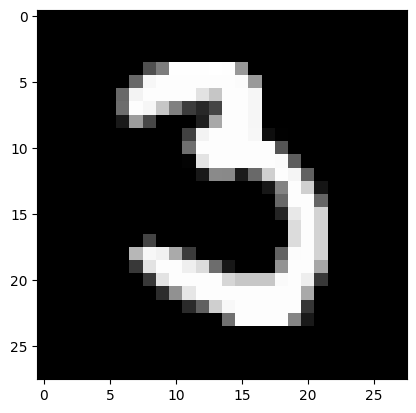

Prediction:  [1]
Label:  1


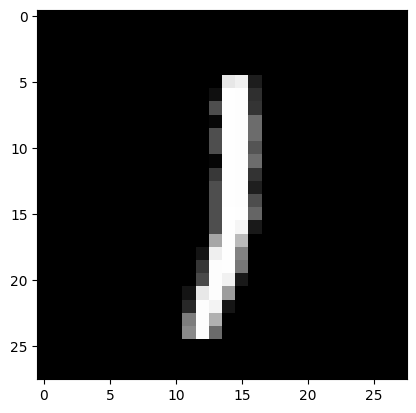

Prediction:  [2]
Label:  2


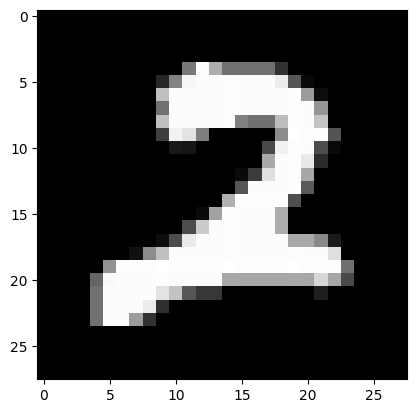

Prediction:  [5]
Label:  5


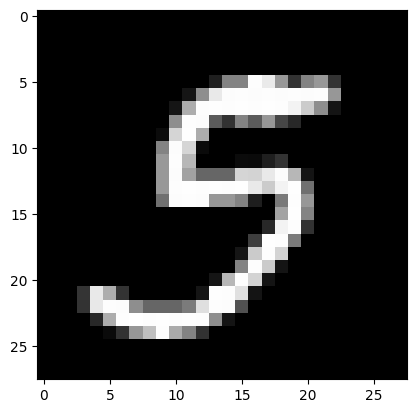

Prediction:  [7]
Label:  2


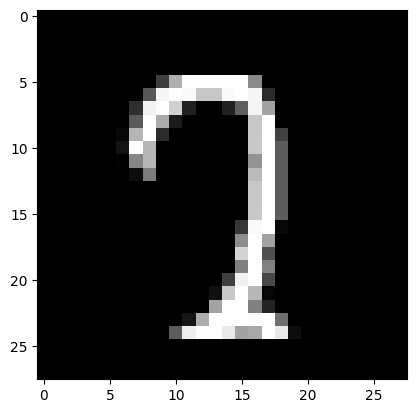

Prediction:  [2]
Label:  6


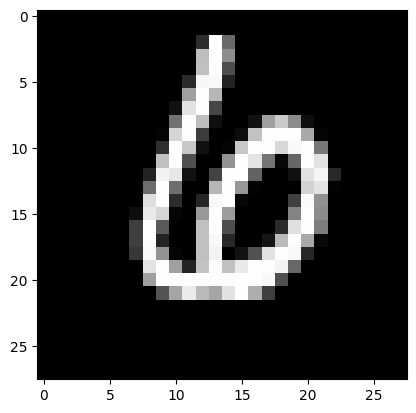

Prediction:  [8]
Label:  8


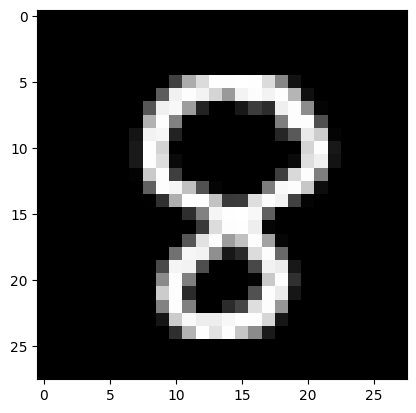

Prediction:  [0]
Label:  0


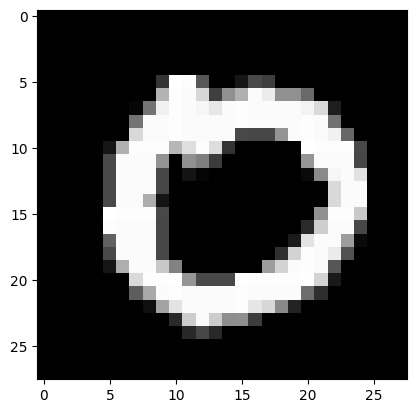

Prediction:  [6]
Label:  6


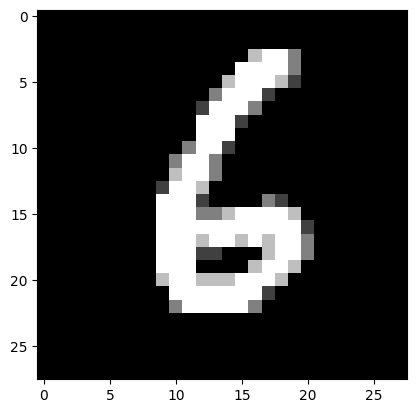

Prediction:  [1]
Label:  1


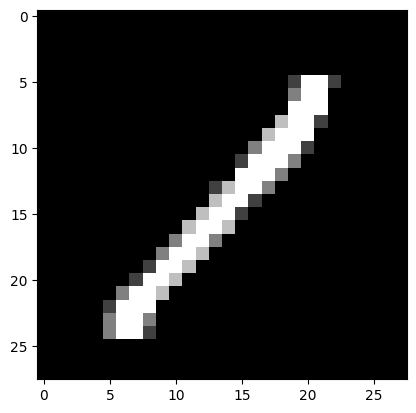

Prediction:  [0]
Label:  0


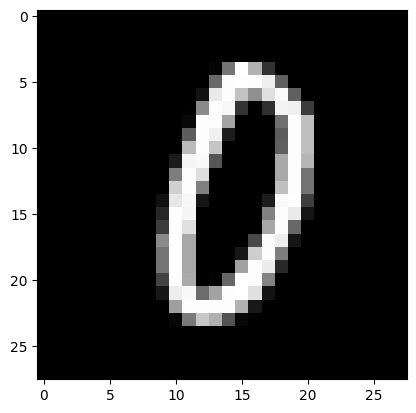

Prediction:  [0]
Label:  0


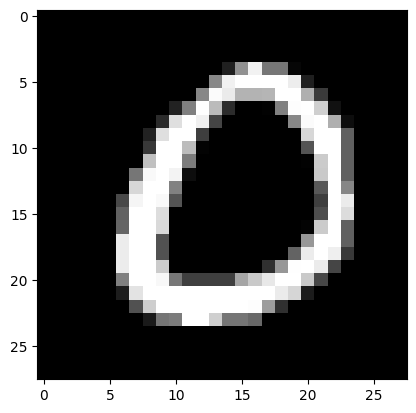

Prediction:  [9]
Label:  9


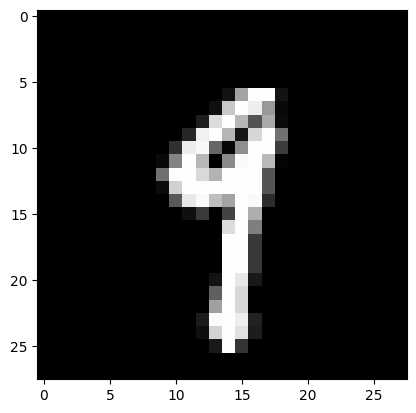

Prediction:  [7]
Label:  7


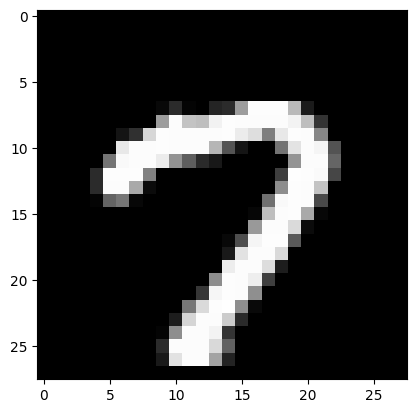

Prediction:  [6]
Label:  6


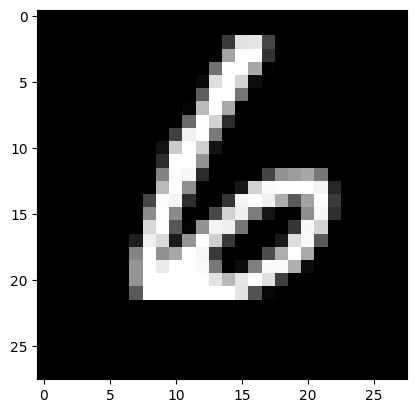

Prediction:  [0]
Label:  0


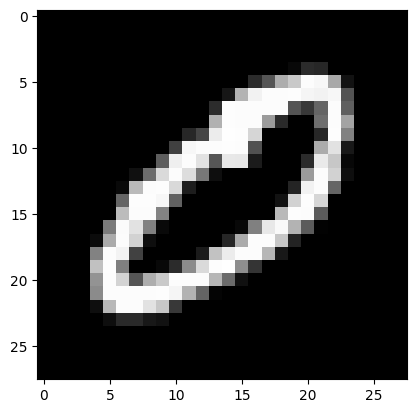

Prediction:  [2]
Label:  2


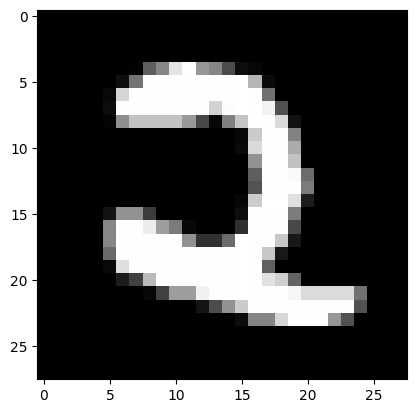

Prediction:  [6]
Label:  6


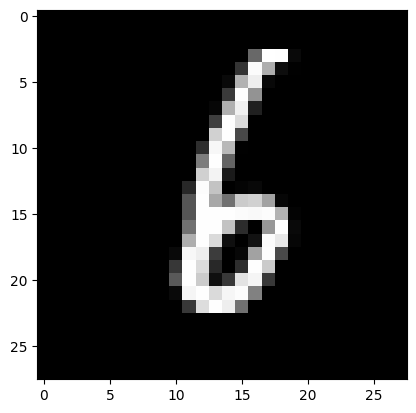

Prediction:  [1]
Label:  1


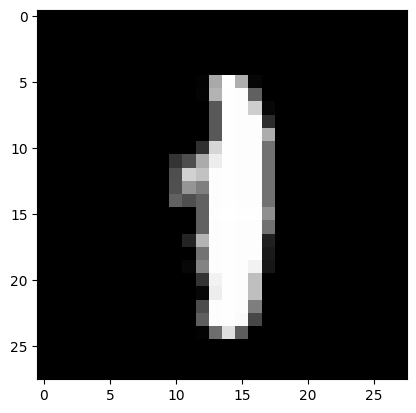

Prediction:  [6]
Label:  6


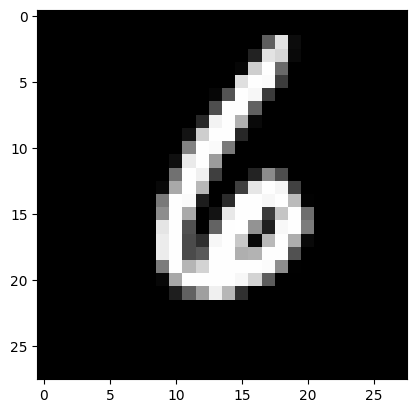

Prediction:  [1]
Label:  1


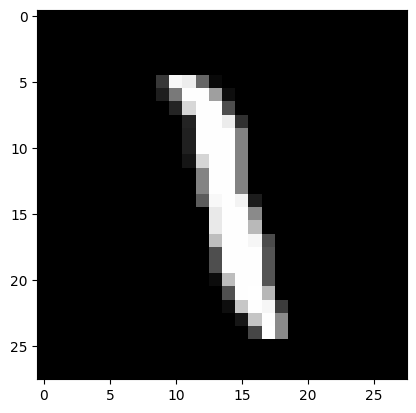

Prediction:  [5]
Label:  5


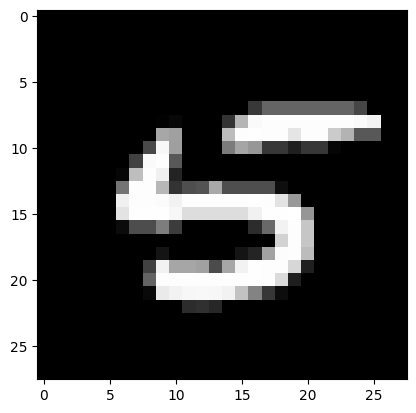

Prediction:  [8]
Label:  8


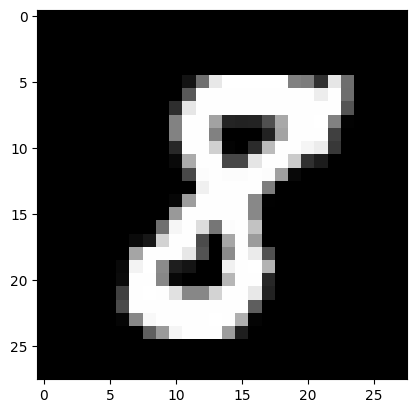

Prediction:  [1]
Label:  1


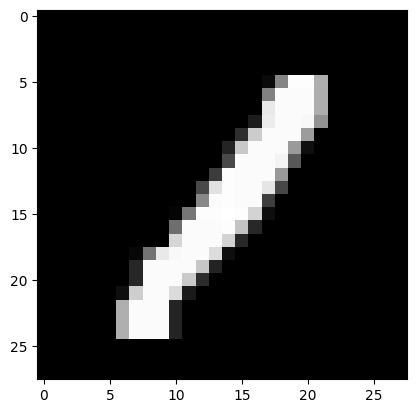

Prediction:  [2]
Label:  2


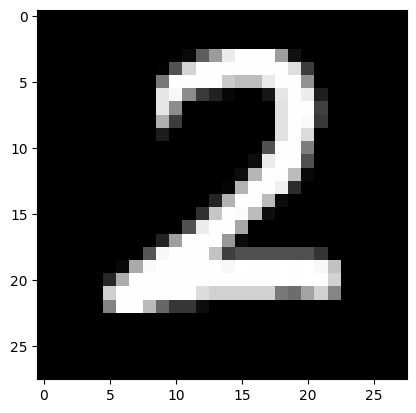

Prediction:  [1]
Label:  1


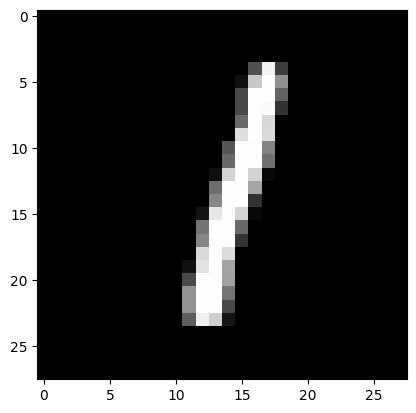

Prediction:  [0]
Label:  0


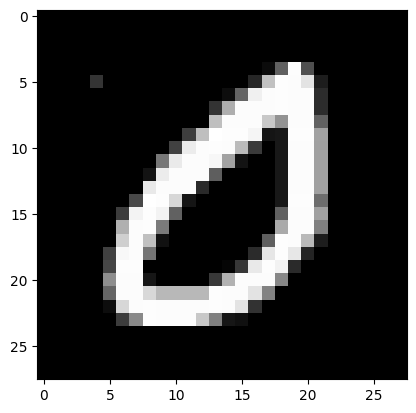

Prediction:  [5]
Label:  5


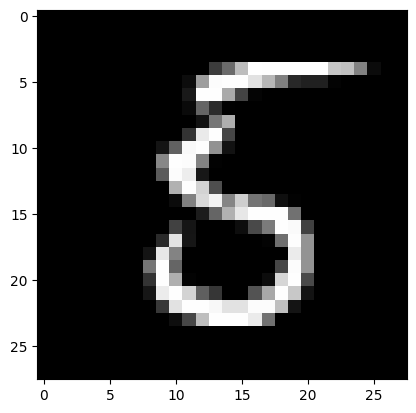

Prediction:  [0]
Label:  0


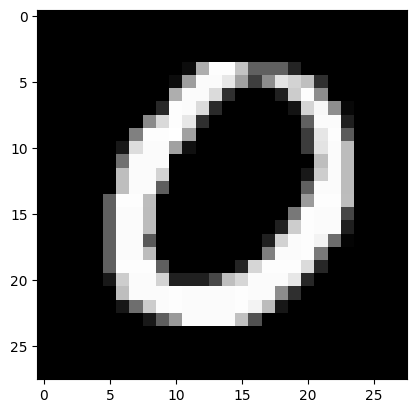

Prediction:  [7]
Label:  7


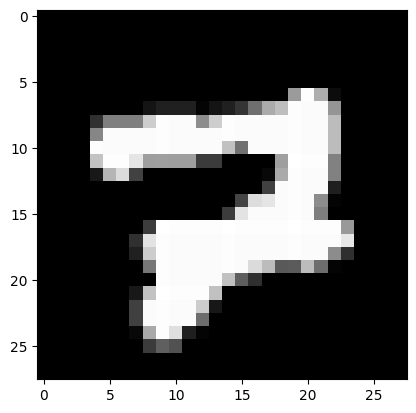

Prediction:  [0]
Label:  0


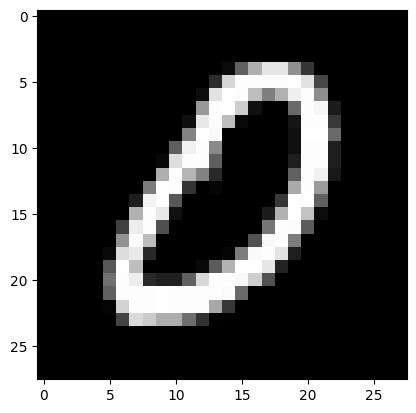

Prediction:  [5]
Label:  5


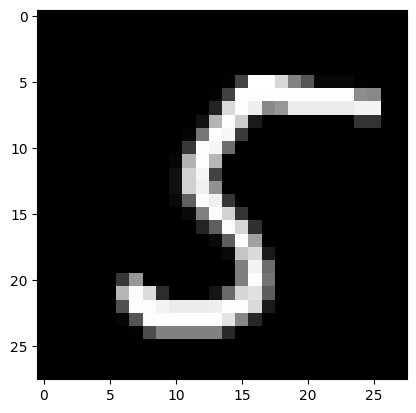

Prediction:  [7]
Label:  3


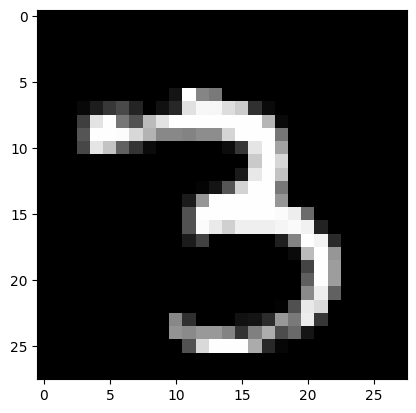

Prediction:  [5]
Label:  5


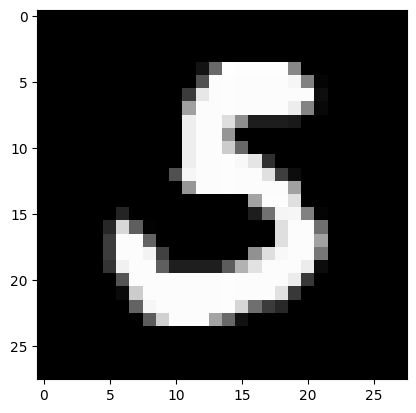

Prediction:  [3]
Label:  3


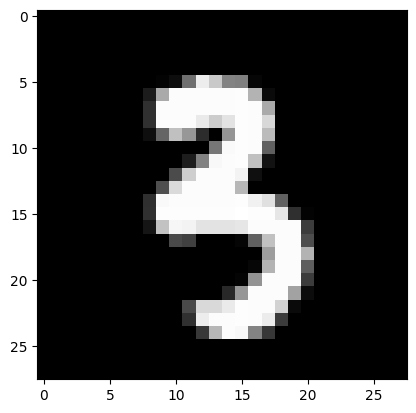

Prediction:  [1]
Label:  1


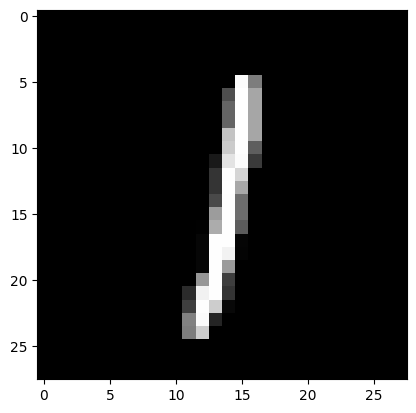

Prediction:  [4]
Label:  4


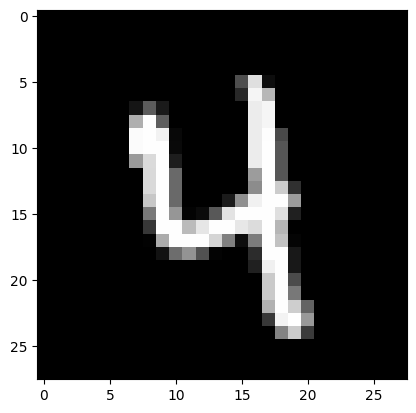

Prediction:  [6]
Label:  6


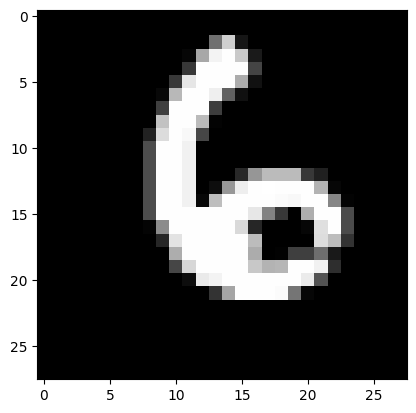

Prediction:  [7]
Label:  7


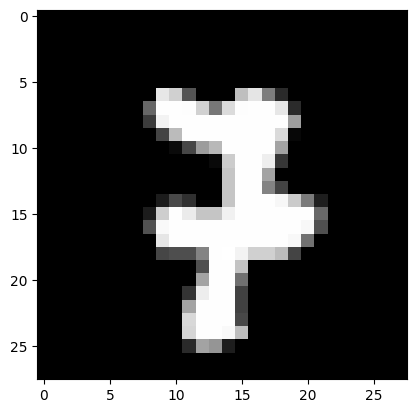

Prediction:  [4]
Label:  7


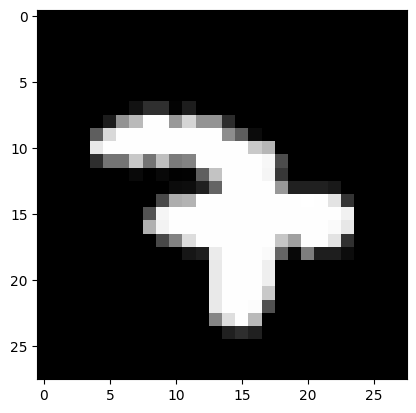

Prediction:  [5]
Label:  5


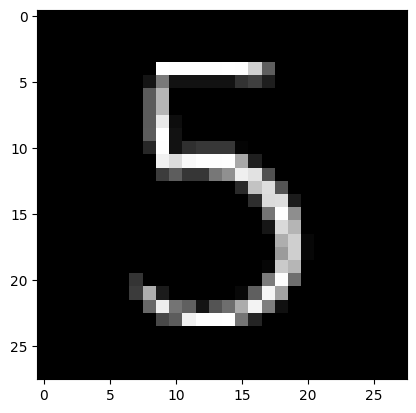

Prediction:  [2]
Label:  2


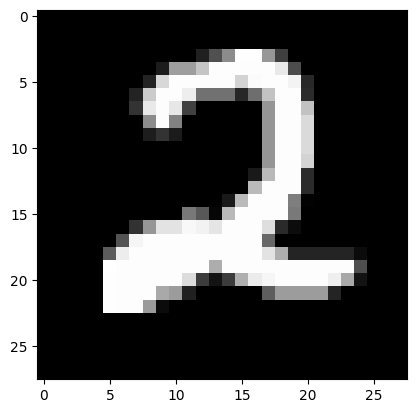

Prediction:  [9]
Label:  9


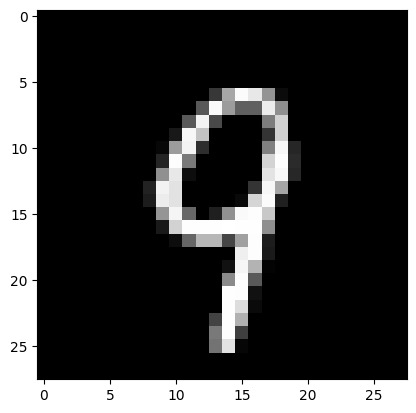

Prediction:  [1]
Label:  1


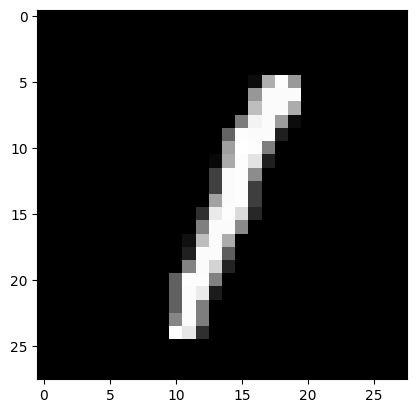

Prediction:  [3]
Label:  3


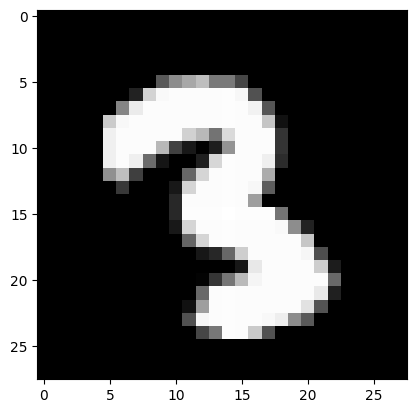

Prediction:  [3]
Label:  1


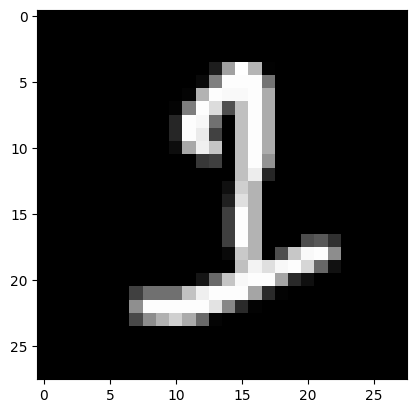

Prediction:  [4]
Label:  4


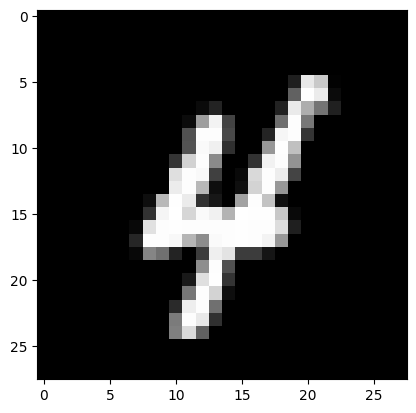

Prediction:  [1]
Label:  8


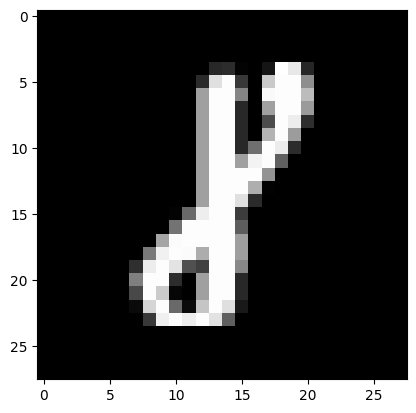

Prediction:  [0]
Label:  0


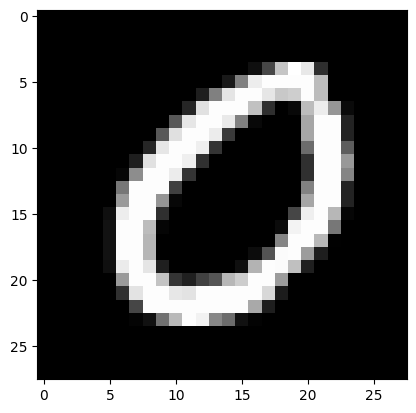

Prediction:  [0]
Label:  0


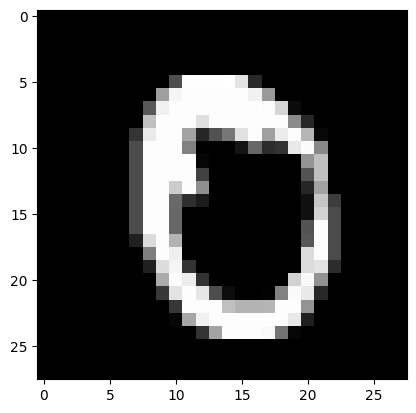

Prediction:  [7]
Label:  7


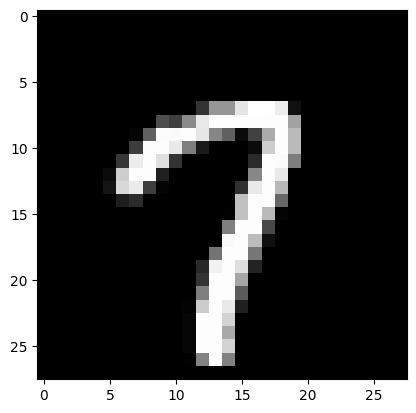

Prediction:  [9]
Label:  2


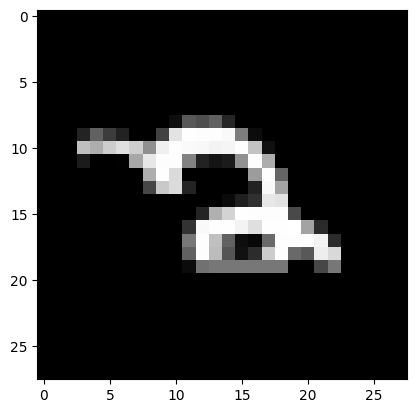

Prediction:  [2]
Label:  8


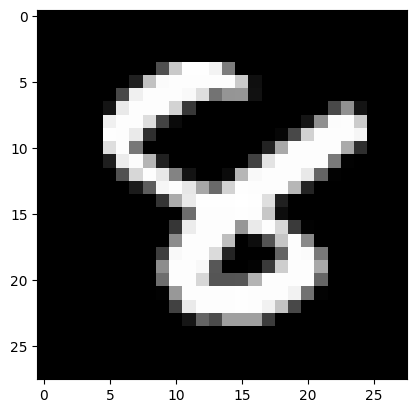

Prediction:  [3]
Label:  4


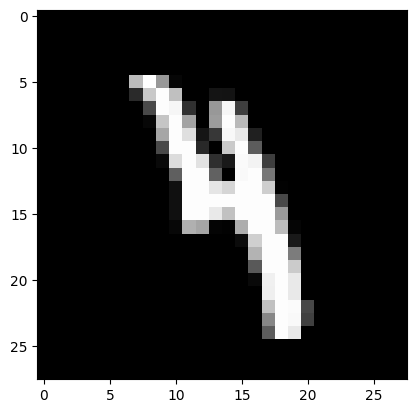

Prediction:  [5]
Label:  5


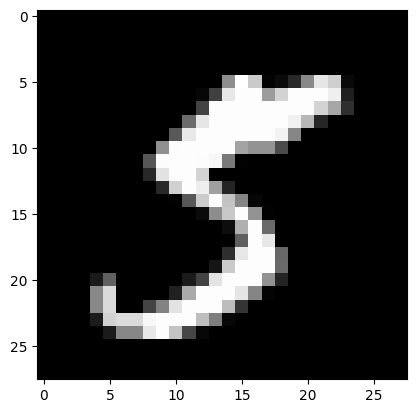

Prediction:  [0]
Label:  0


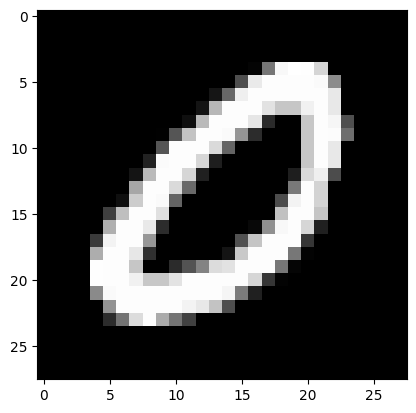

Prediction:  [9]
Label:  4


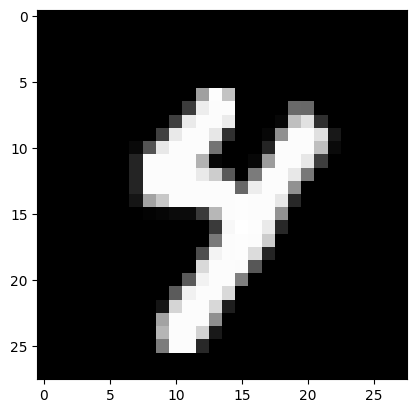

Prediction:  [8]
Label:  1


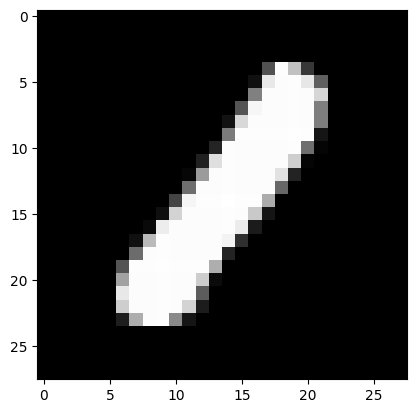

Prediction:  [8]
Label:  8


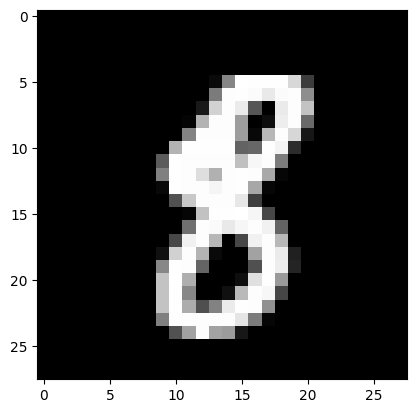

Prediction:  [0]
Label:  0


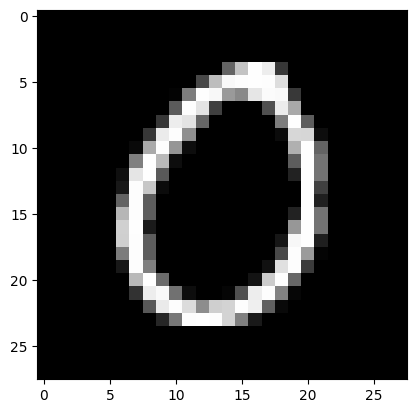

Prediction:  [0]
Label:  0


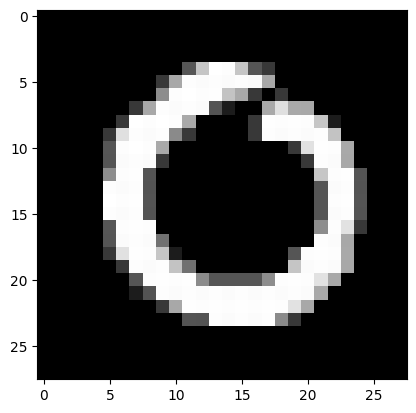

Prediction:  [0]
Label:  0


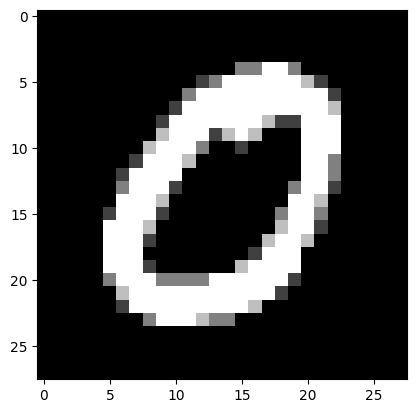

Prediction:  [6]
Label:  6


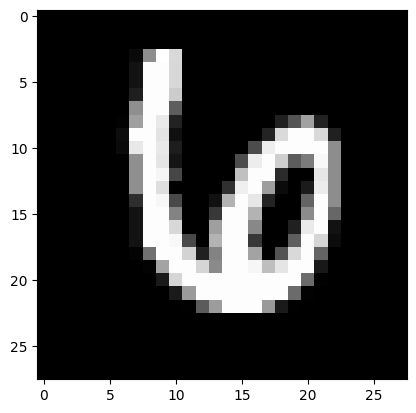

Prediction:  [5]
Label:  5


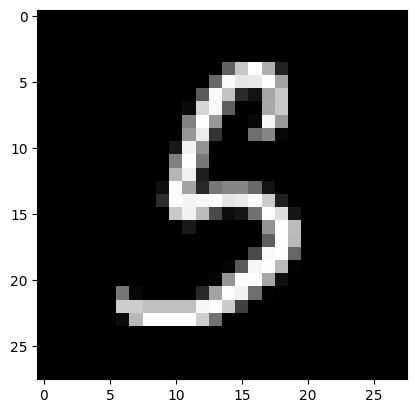

Prediction:  [6]
Label:  6


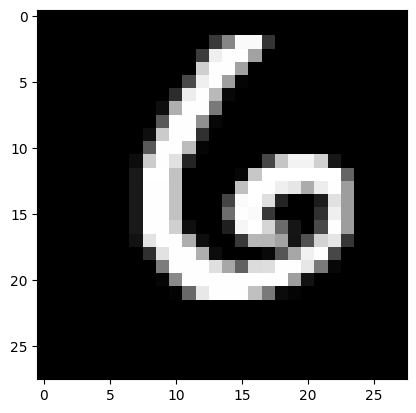

Prediction:  [3]
Label:  5


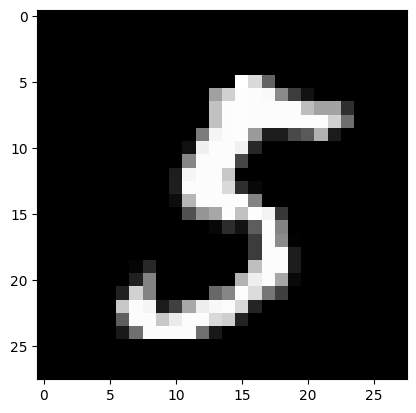

Prediction:  [6]
Label:  6


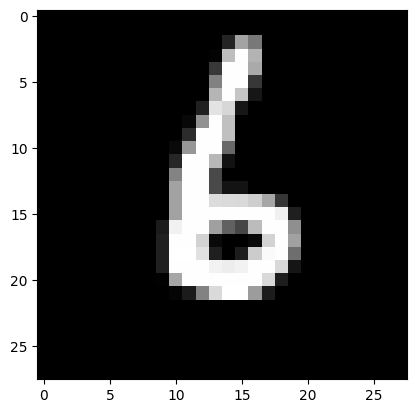

Prediction:  [1]
Label:  1


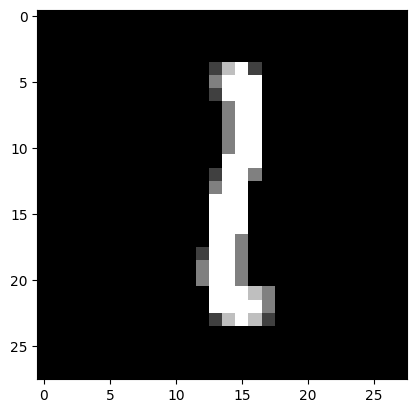

Prediction:  [1]
Label:  1


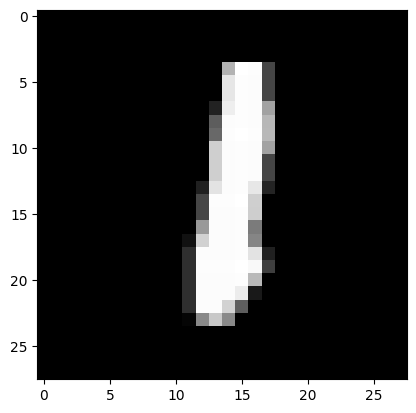

Prediction:  [8]
Label:  8


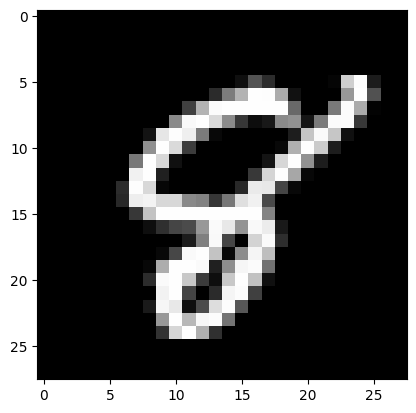

Prediction:  [2]
Label:  2


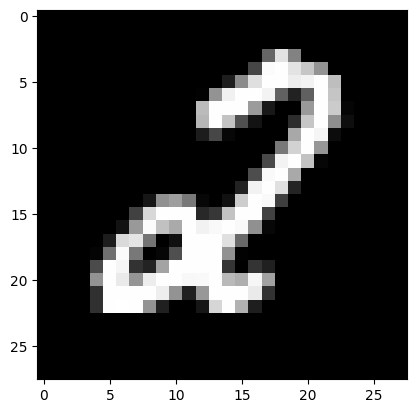

Prediction:  [9]
Label:  9


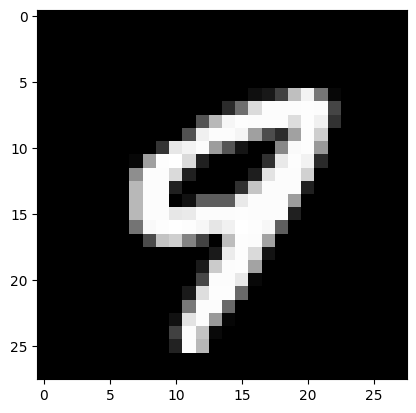

Prediction:  [3]
Label:  3


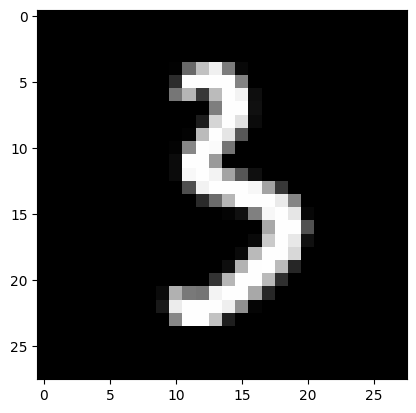

Prediction:  [9]
Label:  9


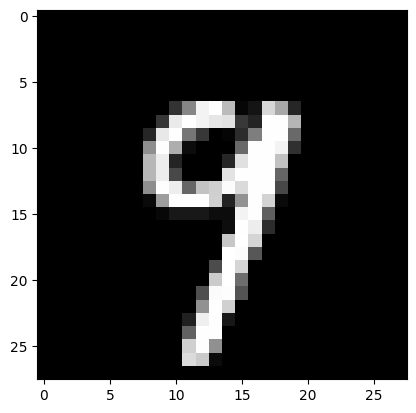

Prediction:  [2]
Label:  2


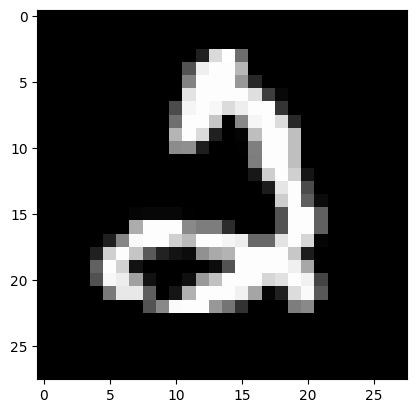

Prediction:  [8]
Label:  8


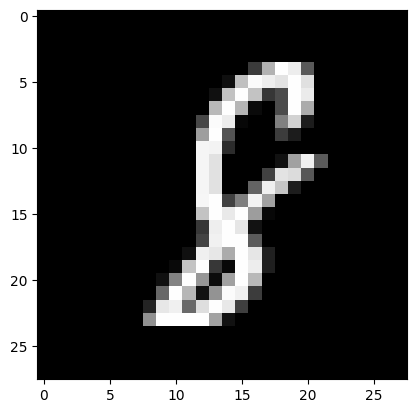

Prediction:  [8]
Label:  8


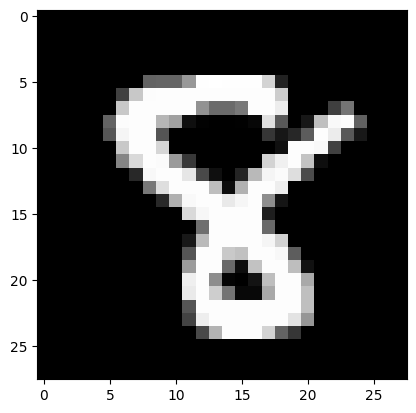

Prediction:  [7]
Label:  2


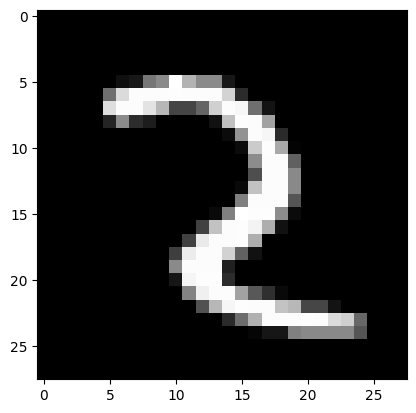

Prediction:  [9]
Label:  9


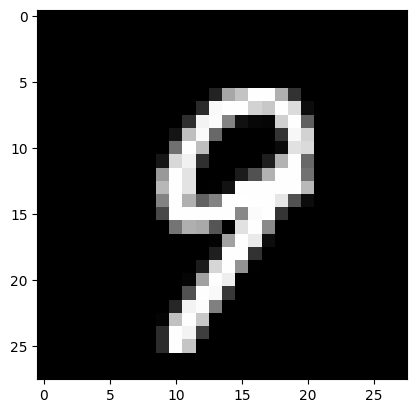

Prediction:  [4]
Label:  4


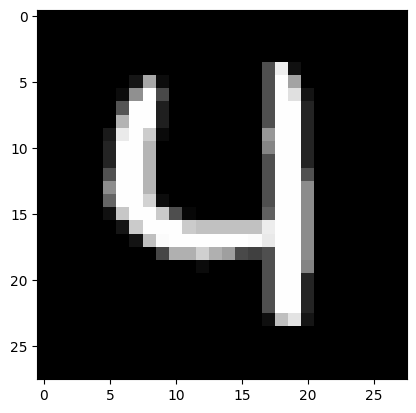

Prediction:  [4]
Label:  4


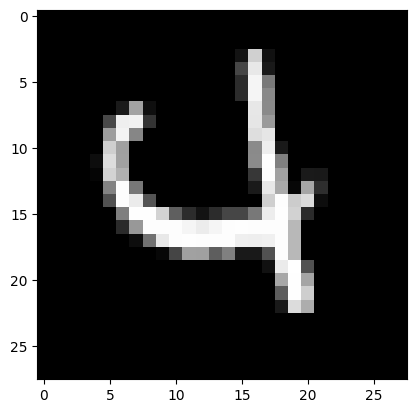

In [46]:
for i in range(0,100):
    test_prediction(i, W1, b1, W2, b2)
